In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import font_manager as fm, rcParams

In [2]:
df = pd.read_csv('Data_Group7_data.csv', index_col=0)

# the Arrivals in df, some of the value is in hh:mm:ss format, so we need to convert it to hh:mm, delete the second
# df['Arrivals'] = df['Arrivals'].str[:-3]

for i in range(len(df['Arrivals'])):
    # if the length of the value is larger than 5 but less than 8, then we need to delete the second
    if len(df['Arrivals'][i]) > 5 and len(df['Arrivals'][i]) <= 8:
        df['Arrivals'][i] = df['Arrivals'][i][:-3]
    # else if the length of the value is larger than 8, then we need to delete the second and the PM
    if len(df['Arrivals'][i]) > 8:
        df['Arrivals'][i] = df['Arrivals'][i][:-6]
        

for i in range(len(df['Departures'])):
    # if the length of the value is larger than 5 but less than 8, then we need to delete the second
    if len(df['Departures'][i]) > 5 and len(df['Departures'][i]) <= 8:
        df['Departures'][i] = df['Departures'][i][:-3]
    # else if the length of the value is larger than 8, then we need to delete the second and the PM
    if len(df['Departures'][i]) > 8:
        df['Departures'][i] = df['Departures'][i][:-6]


In [3]:
df[["Arrivals","Departures"]] = df[["Arrivals","Departures"]].astype('datetime64[ns]')

df["service_time"] =  df["Departures"] - df["Arrivals"]
time_parts = df["service_time"].apply(lambda x: pd.Series(str(x).split(":")))  # split the time string into hours, minutes, and seconds

In [4]:
# FONT
prop = fm.FontProperties(fname="Chakra_Petch\ChakraPetch-Bold.ttf")
prop2 = fm.FontProperties(fname="Fira_Code(1)\FiraCode-VariableFont_wght.ttf")


<Axes: title={'left': 'Service Time with Density Line'}, xlabel='Time (Minutes)', ylabel='Density'>

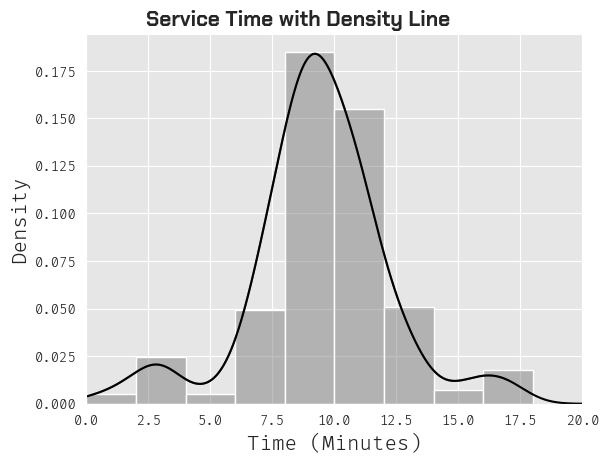

In [5]:
#sns.set_palette("light:b", n_colors=None, desat=None, color_codes=False)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(pd.to_numeric(time_parts[1]), bins = [0, 2, 4, 6, 8, 10,12,14,16, 18], kde=True, stat='density', color = "grey")

plt.title(
    'Service Time with Density Line',
    fontproperties=prop,
    fontsize='15',
    loc='left',
    fontweight='bold',
    x = 0.12)
plt.xlabel('Time (Minutes)', fontweight='bold',
    fontproperties=prop2, fontsize='15')
plt.ylabel('Density', fontweight='bold',
    fontproperties=prop2, fontsize='15')
plt.yticks(fontproperties=prop2)
plt.xticks(fontproperties=prop2)
plt.xlim([0, 20])

pd.to_numeric(time_parts[1]).plot(kind = "density", color = "black")



             0    1    2
0          NaT  NaN  NaN
1    0 days 00   01   00
2    0 days 00   01   00
3    0 days 00   02   00
4    0 days 00   00   00
..         ...  ...  ...
279  0 days 00   02   00
280  0 days 00   02   00
281  0 days 00   00   00
282  0 days 00   16   00
283  0 days 00   03   00

[284 rows x 3 columns]


(0.0, 6.0)

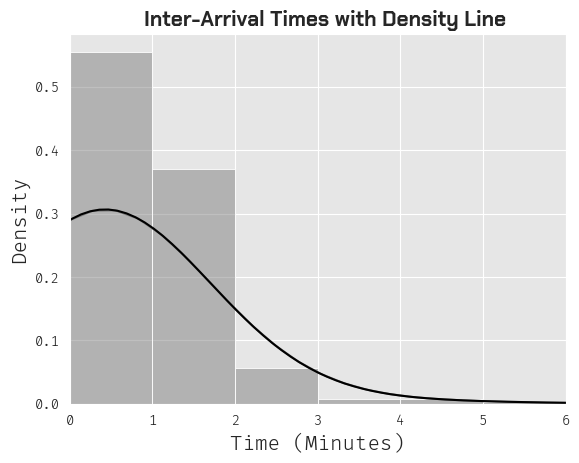

In [6]:
df["interarrivals"] = df["Arrivals"] - df["Arrivals"].shift(1)
time_parts_2 = df["interarrivals"].apply(lambda x: pd.Series(str(x).split(":")))  # split the time string into hours, minutes, and seconds

print(time_parts_2)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

sns.histplot(pd.to_numeric(time_parts_2[1]), bins = [0,1,2,3,4,5,6], kde=True, stat='density', color = "grey")

pd.to_numeric(time_parts_2[1]).plot(kind = "density", color = "black")

plt.title(
    'Inter-Arrival Times with Density Line',
    fontproperties=prop,
    fontsize='15',
    loc='left',
    fontweight='bold',
    x = 0.15)
plt.xlabel('Time (Minutes)', fontweight='bold',
    fontproperties=prop2, fontsize='15')
plt.ylabel('Density', fontweight='bold',
    fontproperties=prop2, fontsize='15')
plt.yticks(fontproperties=prop2)
plt.xticks(fontproperties=prop2)
plt.xlim([0, 6])




In [7]:
df['Arrivals'] = pd.to_datetime(df['Arrivals'], format='%H:%M', errors='coerce')
df['Departures'] = pd.to_datetime(df['Departures'], format='%H:%M', errors='coerce')

df.dropna(subset=['Arrivals', 'Departures'], inplace=True)

#Here we obtain a list of our times in seconds, for use in our models later on
times = pd.to_datetime(df['Arrivals']).dt.time
arrival_times = []
for time in times:
    h = time.hour
    m = time.minute
    arrival_times.append(int(h)*3600 +int(m*60))

#Here we obtain the interarrival times and rate
interarrival_times = df['Arrivals'].diff().dt.total_seconds().dropna()
interarrival_rate = np.mean(interarrival_times)/60
#Here we get the service times as a time difference
service_times = (df['Departures']-df['Arrivals']).astype('timedelta64[m]')

In [8]:
#This code is for our mu and lambda
print("Mean Service Time/mu: ",np.mean(service_times))
print("Mean interarrival rate/lambda: ",interarrival_rate)
lamb = interarrival_rate
mu = np.mean(service_times)

Mean Service Time/mu:  9.355633802816902
Mean interarrival rate/lambda:  1.0106007067137808


In [9]:
from distfit import distfit
import numpy as np
import matplotlib.pyplot as plt


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4.48073] [loc=1.011 scale=6.890]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2.40625] [loc=0.000 scale=1.011]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 2.40625] [loc=-1073741824.000 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 3.7167] [loc=1.000 scale=6.038]
[distfit] >INFO> [t         ] [0.11 sec] [RSS: 4.77799] [loc=0.000 scale=0.000]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 4.77806] [loc=0.000 scale=0.000]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 4.35771] [loc=-0.000 scale=1.549]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 4.08054] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.08 sec] [RSS: 1.67912] [loc=-0.000 scale=415.373]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 4.74947] [loc=0.000 scale=115.000]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 4.50537] [loc=-2390.971 scale=319.141]
[distfit] >INFO> Compute confidence inter

          name     score           loc         scale  \
0         beta  1.679124          -0.0    415.372575   
1        expon  2.406254           0.0      1.010601   
2       pareto  2.406254 -1073741824.0  1073741824.0   
3     dweibull  3.716701           1.0      6.037924   
4      lognorm  4.080537          -0.0      0.000336   
5        gamma  4.357711          -0.0      1.548577   
6         norm  4.480735      1.010601      6.890093   
7     loggamma  4.505367  -2390.970532    319.141241   
8      uniform  4.749475           0.0         115.0   
9            t  4.777992           0.0           0.0   
10  genextreme  4.778057           0.0           0.0   

                                        arg  \
0   (0.6138102298143052, 682.4123139668283)   
1                                        ()   
2                     (1062478821.6154568,)   
3                     (0.3455303200998049,)   
4                      (3.886426792056218,)   
5                   (0.019701975927168817,)  

[distfit] >INFO> Estimated distribution: Beta(loc:-0.000000, scale:415.372575)


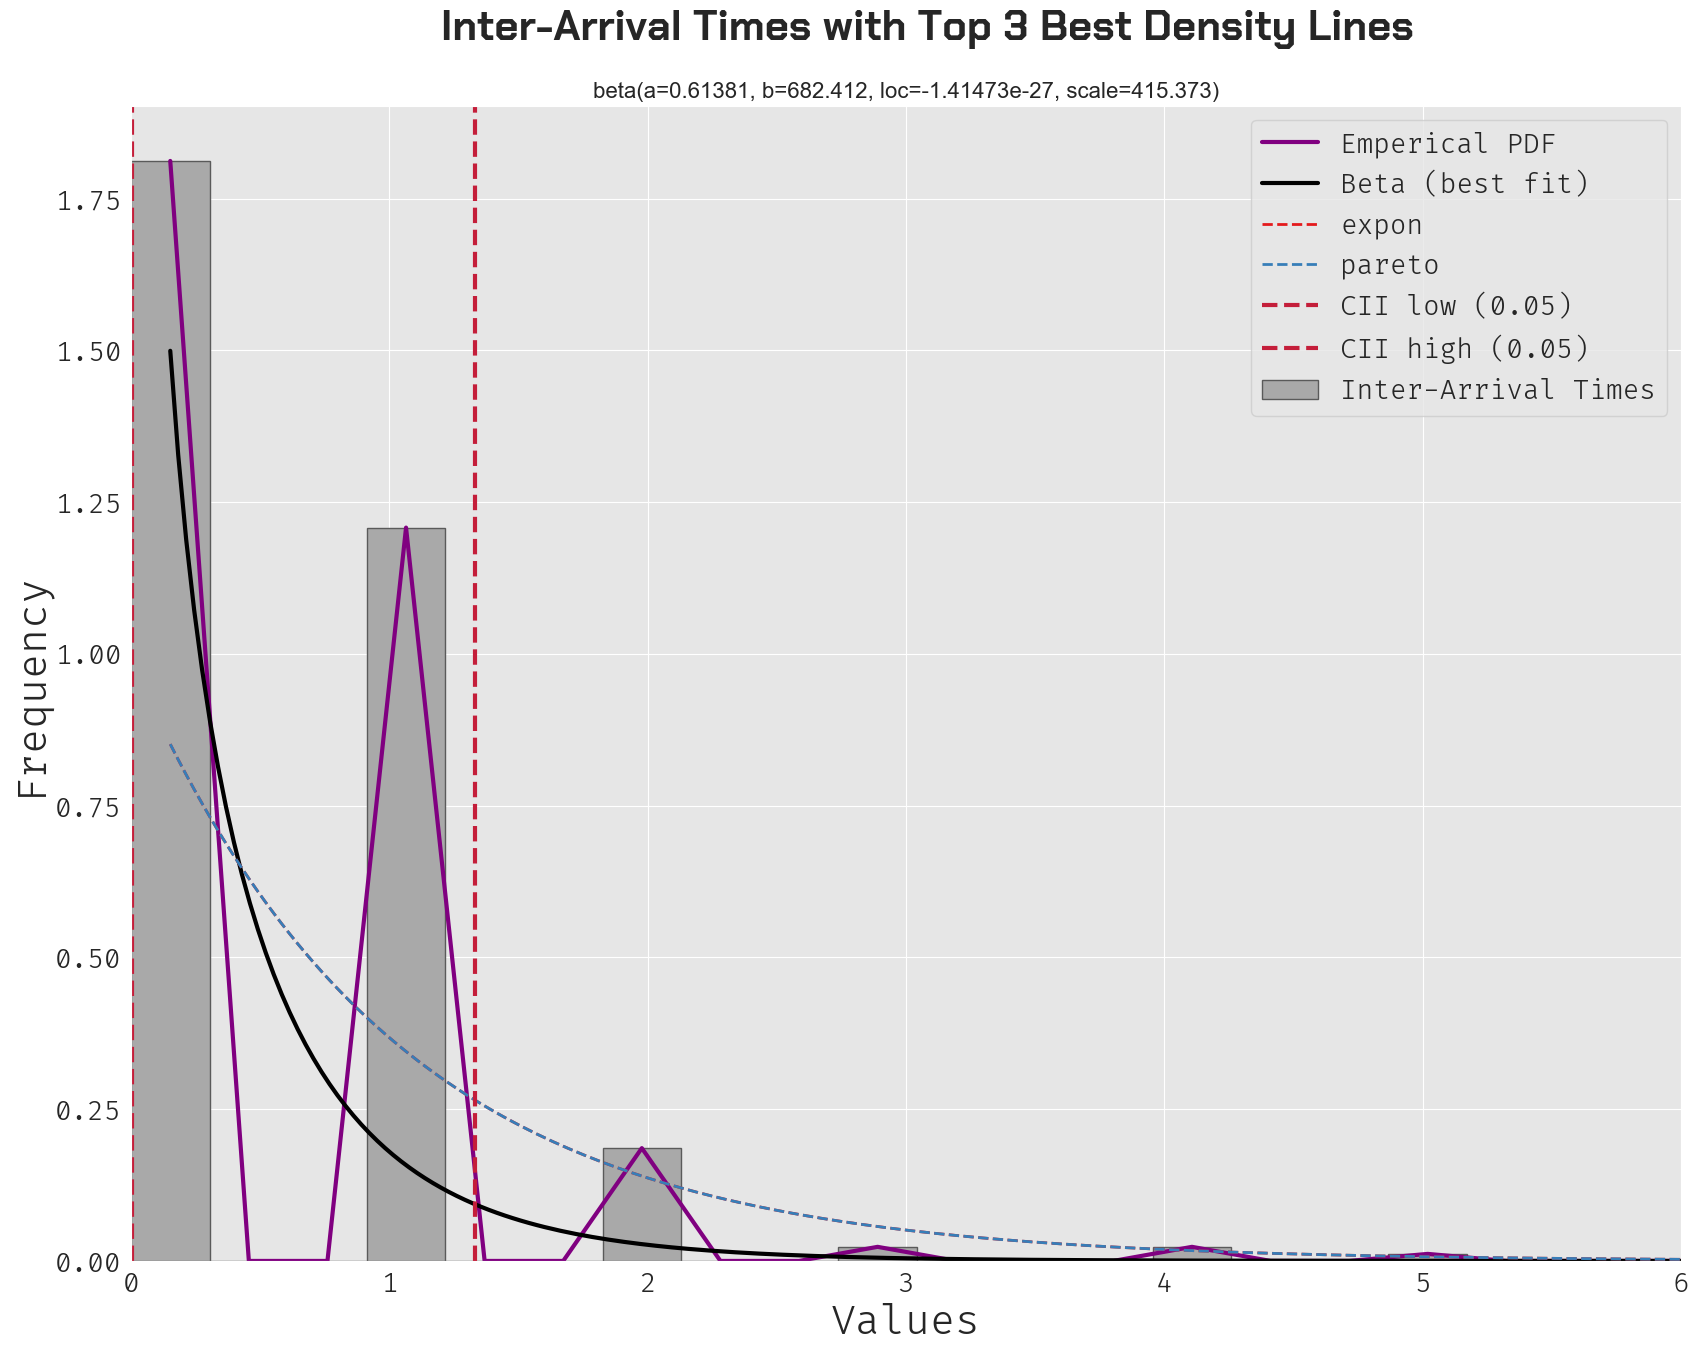

In [10]:
# Initialize model
dfit = distfit()
# Find best theoretical distribution for empirical data X
dfit.fit_transform(np.array(interarrival_times)/60)

print(dfit.summary)

dfit.plot(n_top=2, bar_properties={'color': 'darkgrey', 'label': "Inter-Arrival Times"}, 
          pdf_properties={'color': 'k'}, 
          emp_properties={'color': 'purple', 'linewidth': 3}, 
         )
plt.title(
    'Inter-Arrival Times with Top 3 Best Density Lines',
    fontproperties=prop,
    fontsize='30',
    loc='left',
    fontweight='bold',
    x=0.2, y=1.05)
plt.xlabel('Values', fontweight='bold',
           fontproperties=prop2, fontsize='30')
plt.ylabel('Frequency', fontweight='bold',
           fontproperties=prop2, fontsize='30')
plt.yticks(fontproperties=prop2, fontsize = '20')
plt.xticks(fontproperties=prop2, fontsize = '20')
plt.xlim([0, 6])


propping = fm.FontProperties(fname="Fira_Code(1)\FiraCode-VariableFont_wght.ttf", size = 20)
plt.legend(prop=propping)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0445026] [loc=9.356 scale=2.793]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.135783] [loc=0.000 scale=9.356]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.135783] [loc=-4294967296.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 0.0836473] [loc=9.000 scale=0.542]
[distfit] >INFO> [t         ] [0.14 sec] [RSS: 0.0408775] [loc=9.416 scale=1.723]
[distfit] >INFO> [genextreme] [0.23 sec] [RSS: 0.273318] [loc=15.869 scale=2.382]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 0.0458549] [loc=-49.493 scale=0.135]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 0.0448282] [loc=-200.923 scale=210.253]
[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 0.0436132] [loc=-443.937 scale=499.476]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.103314] [loc=0.000 scale=17.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.0433173] [loc=-68.795 scale=19.890]
[distfit] >INFO> C

          name     score           loc         scale  \
0            t  0.040878       9.41585      1.722931   
1     loggamma  0.043317    -68.795356     19.890155   
2         beta  0.043613   -443.936895    499.475886   
3         norm  0.044503      9.355634      2.792773   
4      lognorm  0.044828   -200.922943    210.253437   
5        gamma  0.045855     -49.49281      0.135405   
6     dweibull  0.083647           9.0      0.541677   
7      uniform  0.103314           0.0          17.0   
8       pareto  0.135783 -4294967296.0  4294967296.0   
9        expon  0.135783           0.0      9.355634   
10  genextreme  0.273318     15.868887      2.381522   

                                       arg  \
0                    (2.6217409681913884,)   
1                    (51.361847362107696,)   
2   (2440.589808649406, 248.6565644110823)   
3                                       ()   
4                   (0.01325268042789432,)   
5                    (434.49428179722815,)   
6    

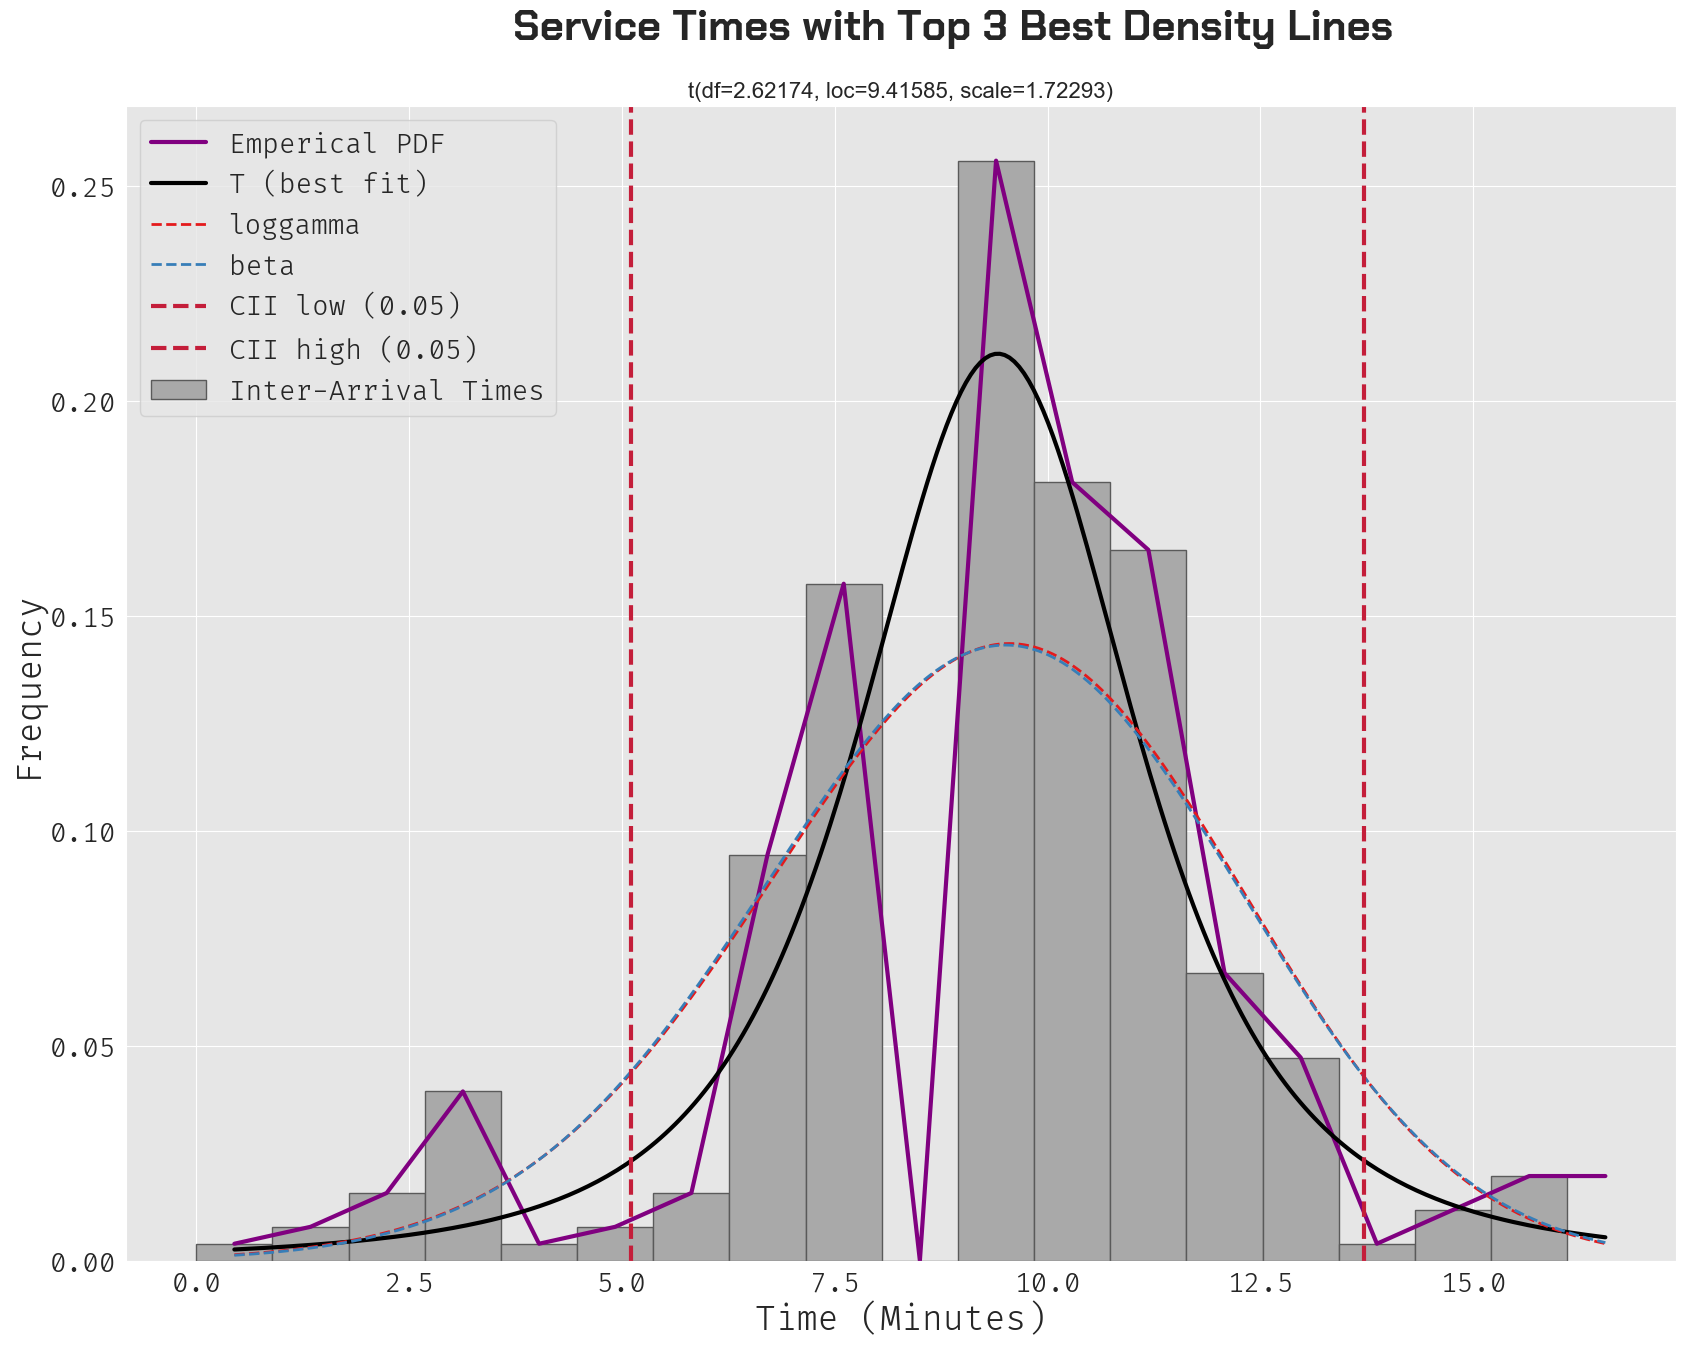

In [11]:
# Initialize model
dfit = distfit()
# Find best theoretical distribution for empirical data X
dfit.fit_transform(np.array(service_times))

print(dfit.summary)

dfit.plot(n_top=2, bar_properties={'color': 'darkgrey', 'label': "Inter-Arrival Times"}, 
          pdf_properties={'color': 'k'}, 
          emp_properties={'color': 'purple', 'linewidth': 3}, 
         )
plt.title(
    'Service Times with Top 3 Best Density Lines',
    fontproperties=prop,
    fontsize='30',
    loc='left',
    fontweight='bold',
    x=0.25,  y =1.05)
plt.xlabel('Time (Minutes)', fontweight='bold',
           fontproperties=prop2, fontsize='25')
plt.ylabel('Frequency', fontweight='bold',
           fontproperties=prop2, fontsize='25')
plt.yticks(fontproperties=prop2, fontsize = '20')
plt.xticks(fontproperties=prop2, fontsize = '20')

propping = fm.FontProperties(fname="Fira_Code(1)\FiraCode-VariableFont_wght.ttf", size = 20)
plt.legend(prop=propping)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4.48073] [loc=1.011 scale=6.890]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2.40625] [loc=0.000 scale=1.011]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 2.40625] [loc=-1073741824.000 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 3.7167] [loc=1.000 scale=6.038]
[distfit] >INFO> [t         ] [0.13 sec] [RSS: 4.77799] [loc=0.000 scale=0.000]
[distfit] >INFO> [genextreme] [0.18 sec] [RSS: 4.77806] [loc=0.000 scale=0.000]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 4.35771] [loc=-0.000 scale=1.549]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 4.08054] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.11 sec] [RSS: 1.67912] [loc=-0.000 scale=415.373]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 4.74947] [loc=0.000 scale=115.000]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 4.50537] [loc=-2390.971 scale=319.141]
[distfit] >INFO> Compute confidence inter

          name     score           loc         scale  \
0         beta  1.679124          -0.0    415.372575   
1        expon  2.406254           0.0      1.010601   
2       pareto  2.406254 -1073741824.0  1073741824.0   
3     dweibull  3.716701           1.0      6.037924   
4      lognorm  4.080537          -0.0      0.000336   
5        gamma  4.357711          -0.0      1.548577   
6         norm  4.480735      1.010601      6.890093   
7     loggamma  4.505367  -2390.970532    319.141241   
8      uniform  4.749475           0.0         115.0   
9            t  4.777992           0.0           0.0   
10  genextreme  4.778057           0.0           0.0   

                                        arg  \
0   (0.6138102298143052, 682.4123139668283)   
1                                        ()   
2                     (1062478821.6154568,)   
3                     (0.3455303200998049,)   
4                      (3.886426792056218,)   
5                   (0.019701975927168817,)  

[distfit] >INFO> [genextreme] [0.21 sec] [RSS: 4.77806] [loc=0.000 scale=0.000]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 4.35771] [loc=-0.000 scale=1.549]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 4.08054] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.08 sec] [RSS: 1.67912] [loc=-0.000 scale=415.373]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 4.74947] [loc=0.000 scale=115.000]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 4.50537] [loc=-2390.971 scale=319.141]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.


          name     score           loc         scale  \
0         beta  1.679124          -0.0    415.372575   
1        expon  2.406254           0.0      1.010601   
2       pareto  2.406254 -1073741824.0  1073741824.0   
3     dweibull  3.716701           1.0      6.037924   
4      lognorm  4.080537          -0.0      0.000336   
5        gamma  4.357711          -0.0      1.548577   
6         norm  4.480735      1.010601      6.890093   
7     loggamma  4.505367  -2390.970532    319.141241   
8      uniform  4.749475           0.0         115.0   
9            t  4.777992           0.0           0.0   
10  genextreme  4.778057           0.0           0.0   

                                        arg  \
0   (0.6138102298143052, 682.4123139668283)   
1                                        ()   
2                     (1062478821.6154568,)   
3                     (0.3455303200998049,)   
4                      (3.886426792056218,)   
5                   (0.019701975927168817,)  

[distfit] >INFO> Estimated distribution: Beta(loc:-0.000000, scale:415.372575)


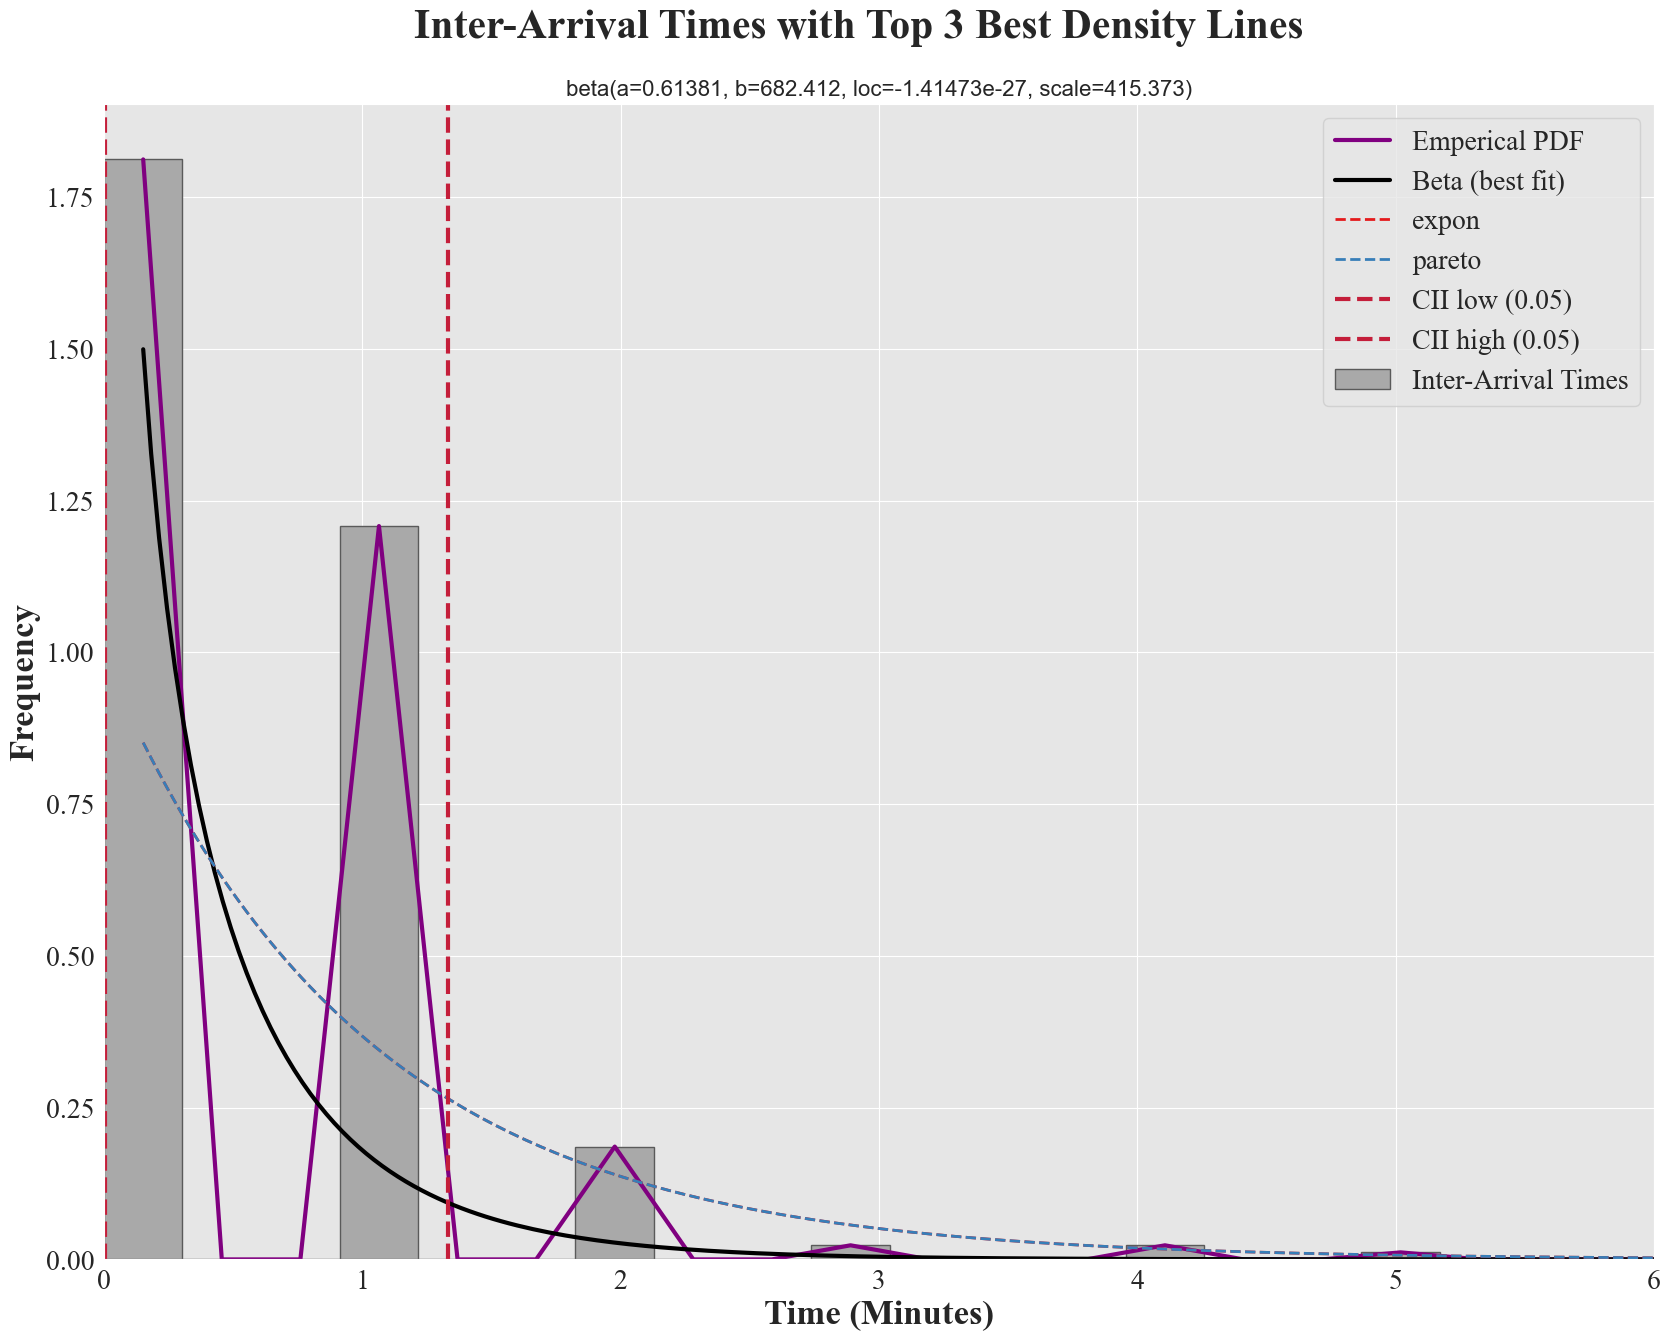

In [12]:
# Initialize model
dfit = distfit()
# Find best theoretical distribution for empirical data X
dfit.fit_transform(np.array(interarrival_times)/60)

print(dfit.summary)

# Initialize model
dfit = distfit()
# Find best theoretical distribution for empirical data X
dfit.fit_transform(np.array(interarrival_times/60))

print(dfit.summary)

dfit.plot(n_top=2, bar_properties={'color': 'darkgrey', 'label': "Inter-Arrival Times"}, 
          pdf_properties={'color': 'k'}, 
          emp_properties={'color': 'purple', 'linewidth': 3}, 
         )
plt.title(
    'Inter-Arrival Times with Top 3 Best Density Lines',
    fontproperties='Times New Roman',
    fontsize='30',
    loc='left',
    fontweight='bold',
    x=0.2,  y =1.05)
plt.xlabel('Time (Minutes)', fontweight='bold',
           fontproperties='Times New Roman', fontsize='25')
plt.ylabel('Frequency', fontweight='bold',
           fontproperties='Times New Roman', fontsize='25')
plt.yticks(fontproperties='Times New Roman', fontsize = '20')
plt.xticks(fontproperties='Times New Roman', fontsize = '20')
plt.xlim([0, 6])

plt.legend(prop={'size': 20, 'family': 'Times New Roman'})

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0445026] [loc=9.356 scale=2.793]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.135783] [loc=0.000 scale=9.356]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.135783] [loc=-4294967296.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 0.0836473] [loc=9.000 scale=0.542]
[distfit] >INFO> [t         ] [0.14 sec] [RSS: 0.0408775] [loc=9.416 scale=1.723]
[distfit] >INFO> [genextreme] [0.22 sec] [RSS: 0.273318] [loc=15.869 scale=2.382]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 0.0458549] [loc=-49.493 scale=0.135]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 0.0448282] [loc=-200.923 scale=210.253]
[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 0.0436132] [loc=-443.937 scale=499.476]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.103314] [loc=0.000 scale=17.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.0433173] [loc=-68.795 scale=19.890]
[distfit] >INFO> C

          name     score           loc         scale  \
0            t  0.040878       9.41585      1.722931   
1     loggamma  0.043317    -68.795356     19.890155   
2         beta  0.043613   -443.936895    499.475886   
3         norm  0.044503      9.355634      2.792773   
4      lognorm  0.044828   -200.922943    210.253437   
5        gamma  0.045855     -49.49281      0.135405   
6     dweibull  0.083647           9.0      0.541677   
7      uniform  0.103314           0.0          17.0   
8       pareto  0.135783 -4294967296.0  4294967296.0   
9        expon  0.135783           0.0      9.355634   
10  genextreme  0.273318     15.868887      2.381522   

                                       arg  \
0                    (2.6217409681913884,)   
1                    (51.361847362107696,)   
2   (2440.589808649406, 248.6565644110823)   
3                                       ()   
4                   (0.01325268042789432,)   
5                    (434.49428179722815,)   
6    

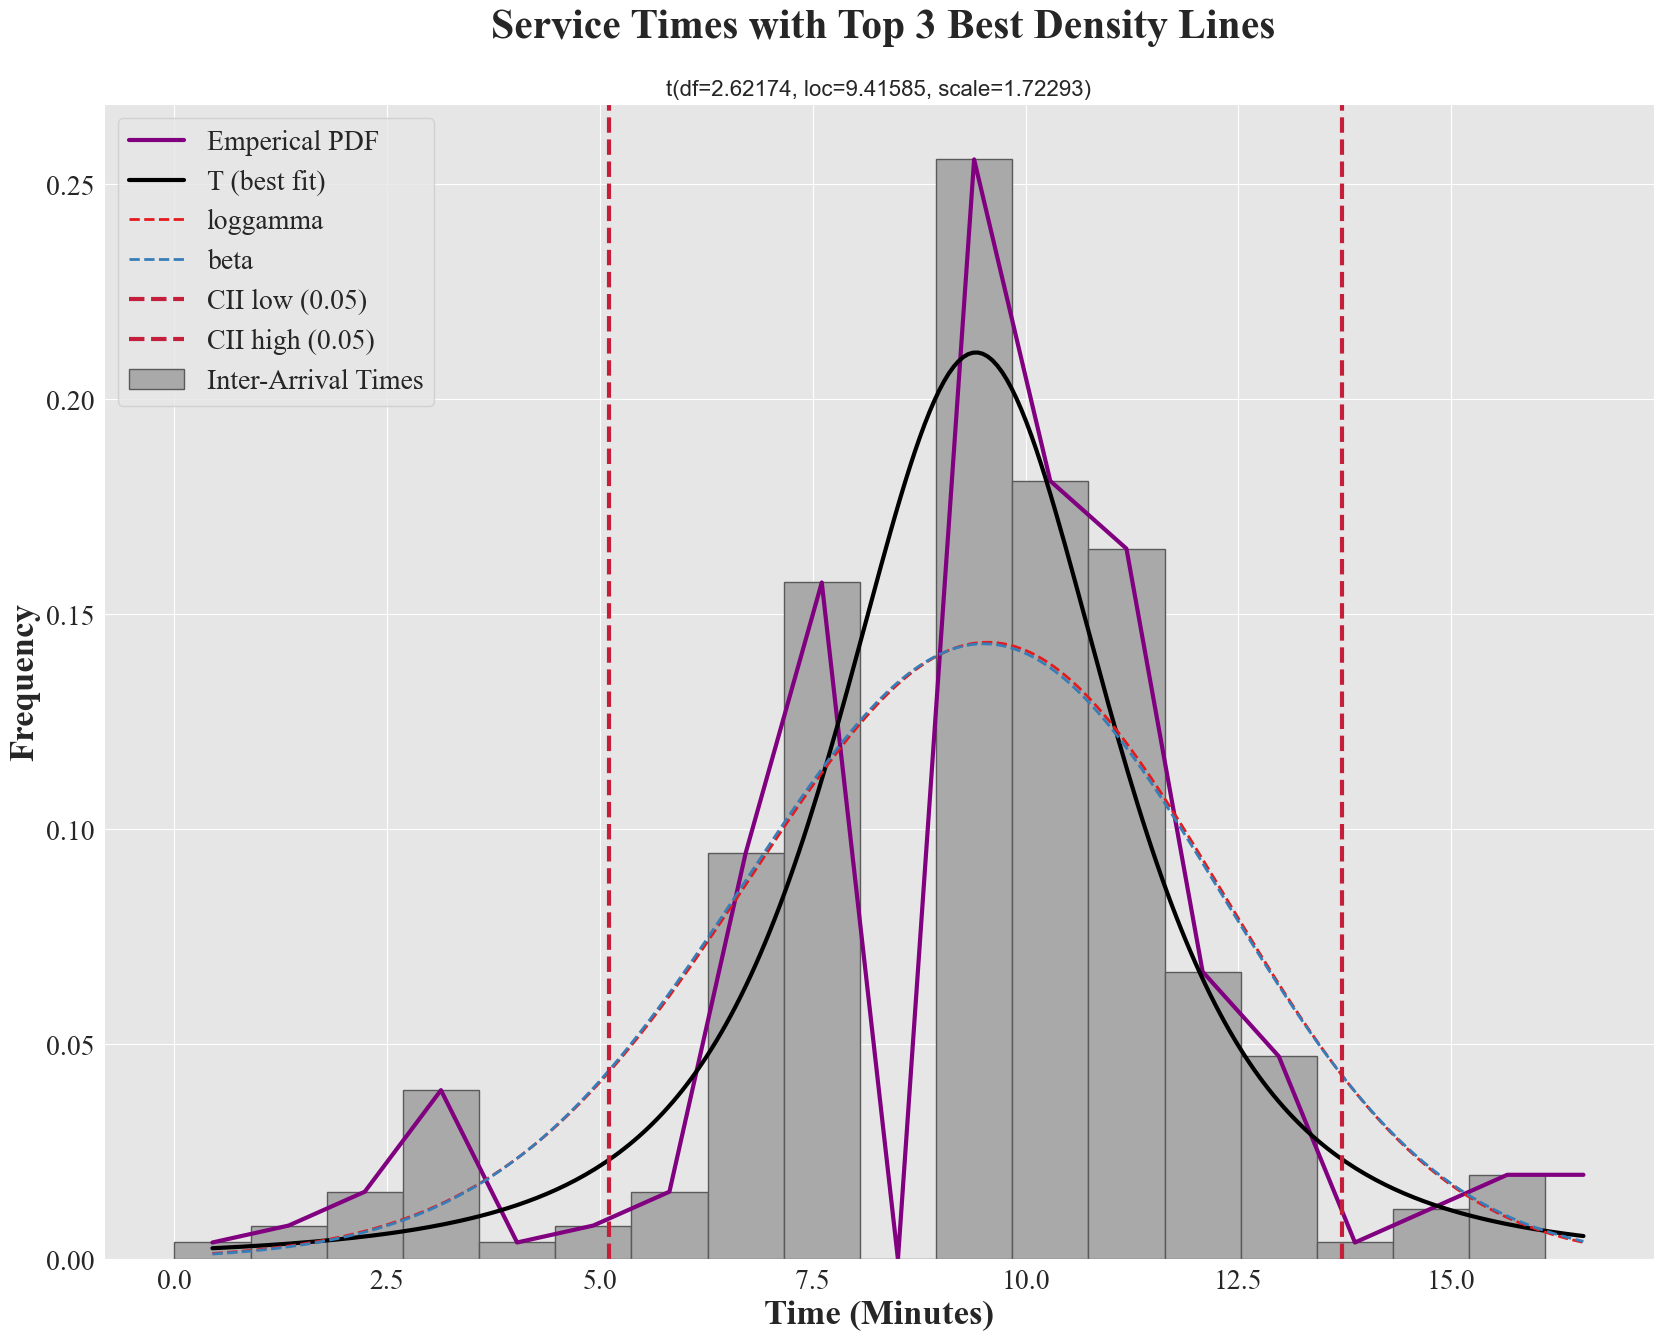

In [13]:
# Initialize model
dfit = distfit()
# Find best theoretical distribution for empirical data X
dfit.fit_transform(np.array(service_times))

print(dfit.summary)

dfit.plot(n_top=2, bar_properties={'color': 'darkgrey', 'label': "Inter-Arrival Times"}, 
          pdf_properties={'color': 'k'}, 
          emp_properties={'color': 'purple', 'linewidth': 3}, 
         )
plt.title(
    'Service Times with Top 3 Best Density Lines',
    fontproperties='Times New Roman',
    fontsize='30',
    loc='left',
    fontweight='bold',
    x=0.25,  y =1.05)
plt.xlabel('Time (Minutes)', fontweight='bold',
           fontproperties='Times New Roman', fontsize='25')
plt.ylabel('Frequency', fontweight='bold',
           fontproperties='Times New Roman', fontsize='25')
plt.yticks(fontproperties='Times New Roman', fontsize = '20')
plt.xticks(fontproperties='Times New Roman', fontsize = '20')


plt.legend(prop={'size': 20, 'family': 'Times New Roman'})